## **Task 10: Библиотека Plotl**

Task 10: Библиотека Plotly
Matplotlib и Seaborn являются действительно многофункциональными библиотеками, которые отлично подходят для решения большинства задач по визуализации данных. Но они не поддерживают функции создания интерактивных диаграмм и анимаций. Для решения такого рода задач применяется библиотека Plotly. В этом упражнении вам нужно будет построить почти такой же график, как и в предыдущем упражнении, но в виде анимации.

Plotly:
- документация библиотеки <i>https://plotly.com/python</i>
- пример из задания <i>https://github.com/datageekrj/YouTubeChannelHostingFiles/blob/master/lineRace.py</i>

In [269]:
import pandas as pd
from sqlite3 import connect
import plotly.graph_objects as go
import numpy as np

In [270]:
from google.colab import drive
drive.mount('/content/drive')

In [271]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [272]:
#path = 'C:/Users/ipinguin/Documents/Edu/School21/ds-11/'
#file = 'data/checking-logs.sqlite'

#con = connect(path+file)

In [273]:
checker = pd.read_sql('SELECT * FROM checker', con)
checker.head()

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1
3,3,ready,0,2020-04-16 21:46:48.121217,7,lab02,admin_1
4,4,checking,0,2020-04-16 21:53:01.862637,6,code_rvw,admin_1


In [274]:
sql = '''
  with num_commits(uid, date) as
  (
    select  uid, 
            date(timestamp) as date
    from  checker
    where uid like "user_%"
      and labname = "project1"
      and status = "ready"
  )
  select  uid,
          date,
          count(*) as qtyTrials
  from  num_commits
  group by uid, date
'''
num_commits = pd.read_sql(sql, con)
num_commits

,uid,date,qtyTrials
0,user_1,2020-05-14,11
1,user_10,2020-05-12,7
2,user_10,2020-05-13,14
3,user_10,2020-05-14,37
4,user_11,2020-05-03,1
...,...,...,...
89,user_4,2020-05-13,12
90,user_4,2020-05-14,27
91,user_6,2020-05-13,1
92,user_6,2020-05-14,1


In [275]:
num_commits = num_commits.sort_values(['date', 'uid']).pivot(index='uid', columns='date', values='qtyTrials').fillna(0).cumsum(axis=1)
num_commits

date,2020-04-17,2020-04-18,2020-04-19,2020-04-22,2020-04-23,2020-04-24,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15
uid,,,,,,,,,,,,,,,,,,,
user_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0
user_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,21.0,58.0,58.0
user_11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
user_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
user_13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,30.0,30.0,32.0,32.0
user_14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,18.0,25.0,49.0,92.0,92.0,99.0,99.0
user_15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
user_16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,9.0,9.0
user_17,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0


In [276]:
num_commits = num_commits.transpose().sort_index().transpose()
num_commits.reset_index(inplace = True)
num_commits

date,uid,2020-04-17,2020-04-18,2020-04-19,2020-04-22,2020-04-23,2020-04-24,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15
0,user_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.0
1,user_10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,21.0,58.0,58.0
2,user_11,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,user_12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0
4,user_13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,30.0,30.0,32.0,32.0
5,user_14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,18.0,25.0,49.0,92.0,92.0,99.0,99.0
6,user_15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0
7,user_16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,9.0,9.0
8,user_17,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0
9,user_18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,8.0,31.0,31.0


In [277]:
qtyRows = num_commits.shape[0]
qtyCols = num_commits.shape[1]
qtyFrames = qtyCols - 1
#xaxis_range = [0, qtyFrames + 2]
xaxis_range = [0, qtyFrames+1]
x_init = np.array([1])

In [278]:
max_commits = num_commits.drop(columns = 'uid').max().max()

In [279]:
init_data = []
for user_idx in range(qtyRows):
  y_axis = np.array(num_commits.iloc[user_idx,0])
  init_data.append(go.Scatter(x = x_init,
                              y = y_axis,
                              mode = "lines", 
                              name = num_commits.uid[user_idx]))
init_max = max_commits

In [280]:
frames = []
for f in range(1, qtyFrames + 1):
  x_axis = np.arange(0, f + 1)
  curr_data = []
  title_names = []
  for user_idx in range(27):
    user = num_commits.uid[user_idx]
    y_axis = np.array(num_commits.iloc[user_idx, 1:f+1])
    curr_data.append(go.Scatter(x = x_axis, y = y_axis, mode = "lines+markers", name = user))
  curr_frame = go.Frame(data = curr_data)
  frames.append(curr_frame)

In [284]:
figure = go.Figure(
    data = init_data,
    layout = {
        "title": "Dynamic of commits per user in project1",
        "xaxis":{"range":xaxis_range, "visible":True, "showline":True, "dtick":2},
        "yaxis":{"visible": True, "showline": True},
        "updatemenus":[{"type":"buttons","buttons":[{"method":"animate", "label":"play", "args":[None]}]}],
        "width":1100,
        "height":600
    },
    frames = frames, layout_yaxis_range = [0, max_commits]
)

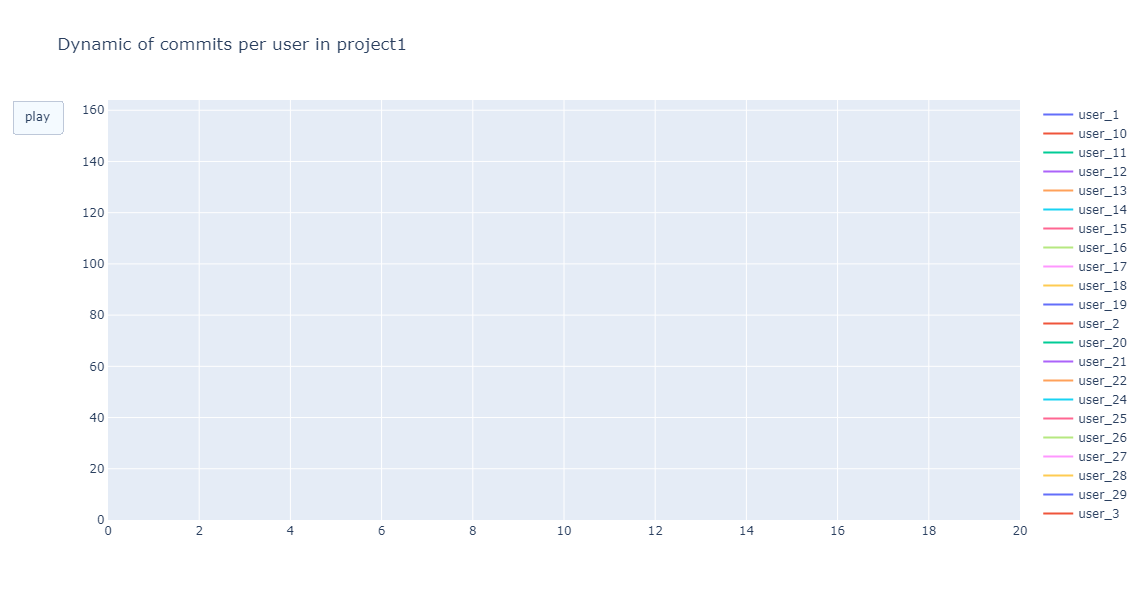

In [285]:
figure.show()

In [283]:
con.close()